In [1]:
from pymongo import MongoClient
import logging

# Configure logging
logging.basicConfig(filename='analysis_log.txt', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

client = MongoClient("mongodb://localhost:27017/")
db = client.bachelor

In [4]:
from statistics import median, mean, stdev
# Official vs unofficial packages
official_vulnerabilities = []
unofficial_vulnerabilities = []

for package in db.packages.find({}):
    if "security_report_summary" in package and package['security_report_summary']:
        total_vulnerabilities = 0
        for severity in package['security_report_summary'].values():
            total_vulnerabilities += severity
            
        if package['repository']['official']:
            official_vulnerabilities.append(total_vulnerabilities)
        else:
            unofficial_vulnerabilities.append(total_vulnerabilities)

avg_official = mean(official_vulnerabilities)
avg_unofficial = mean(unofficial_vulnerabilities)

median_official = median(official_vulnerabilities)
median_unofficial = median(unofficial_vulnerabilities)

stdev_official = stdev(official_vulnerabilities)
stdev_unofficial = stdev(unofficial_vulnerabilities)

print (f"Durchschnittliche Anzahl von Schwachstellen in offiziellen Paketen: {avg_official}")
print (f"Durchschnittliche Anzahl von Schwachstellen in inoffiziellen Paketen: {avg_unofficial}")
print (f"Median Anzahl von Schwachstellen in offiziellen Paketen: {median_official}")
print (f"Median Anzahl von Schwachstellen in inoffiziellen Paketen: {median_unofficial}")
print (f"Standardabweichung Anzahl von Schwachstellen in offiziellen Paketen: {stdev_official}")
print (f"Standardabweichung Anzahl von Schwachstellen in inoffiziellen Paketen: {stdev_unofficial}")
print (f"Anzahl offizieller Pakete: {len(official_vulnerabilities)}")
print (f"Anzahl inoffizieller Pakete: {len(unofficial_vulnerabilities)}")


Durchschnittliche Anzahl von Schwachstellen in offiziellen Paketen: 322.5974025974026
Durchschnittliche Anzahl von Schwachstellen in inoffiziellen Paketen: 554.4443177499049
Median Anzahl von Schwachstellen in offiziellen Paketen: 96
Median Anzahl von Schwachstellen in inoffiziellen Paketen: 135
Standardabweichung Anzahl von Schwachstellen in offiziellen Paketen: 718.118012947371
Standardabweichung Anzahl von Schwachstellen in inoffiziellen Paketen: 1338.3093927648047
Anzahl offizieller Pakete: 77
Anzahl inoffizieller Pakete: 7893


In [5]:
print(official_vulnerabilities)

[1, 335, 0, 394, 25, 37, 46, 192, 46, 3, 72, 3088, 108, 50, 153, 790, 206, 36, 7, 53, 1, 50, 130, 0, 335, 111, 31, 3, 206, 122, 10, 185, 363, 266, 8, 31, 2562, 31, 2655, 606, 196, 223, 15, 15, 228, 2, 59, 3300, 162, 58, 89, 803, 507, 144, 152, 205, 21, 107, 9, 265, 3034, 823, 0, 0, 19, 108, 208, 97, 1, 96, 195, 4, 38, 1, 4, 296, 8]


In [6]:
print(unofficial_vulnerabilities)

[552, 106, 31, 437, 31, 323, 41, 370, 10, 41, 137, 433, 298, 619, 19, 298, 49, 45, 77, 72, 180, 2, 48, 1184, 2, 13, 3063, 201, 167, 613, 95, 268, 473, 208, 298, 208, 253, 21, 69, 293, 458, 165, 110, 298, 772, 640, 177, 783, 510, 7089, 1, 241, 49, 510, 38, 1459, 423, 117, 1894, 12, 66, 62, 89, 209, 3, 370, 436, 3632, 141, 45, 161, 795, 271, 6, 62, 158, 434, 171, 51, 0, 314, 2274, 535, 23, 302, 4, 483, 2990, 1075, 109, 42, 352, 416, 25, 1112, 1779, 48, 705, 302, 26, 280, 0, 476, 302, 0, 4, 8269, 194, 211, 311, 302, 311, 26, 302, 290, 56, 71, 1537, 184, 992, 3, 1428, 2016, 38, 311, 9, 311, 37, 8, 30, 401, 175, 23, 66, 4, 115, 99, 17, 766, 76, 126, 345, 3770, 77, 169, 93, 21, 333, 314, 192, 6, 351, 8, 491, 18, 23, 69, 12756, 789, 9, 563, 152, 15, 13, 23, 29, 73, 31, 986, 237, 37, 141, 1506, 252, 72, 289, 25, 6, 16, 290, 391, 47, 9, 89, 295, 45, 612, 54, 15456, 454, 52, 377, 34, 1797, 1767, 86, 141, 5, 208, 1128, 3, 11, 32, 8, 11, 273, 1866, 71, 704, 267, 150, 43, 424, 7309, 3742, 18, 0, 90

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(official_vulnerabilities, unofficial_vulnerabilities, alternative='two-sided')

print(f"Mann-Whitney U Test: stat={stat}, p={p}")

Mann-Whitney U Test: stat=255944.5, p=0.017037870956289246


Anzahl der Helm Charts mit Schwachstellen Scan: 5450


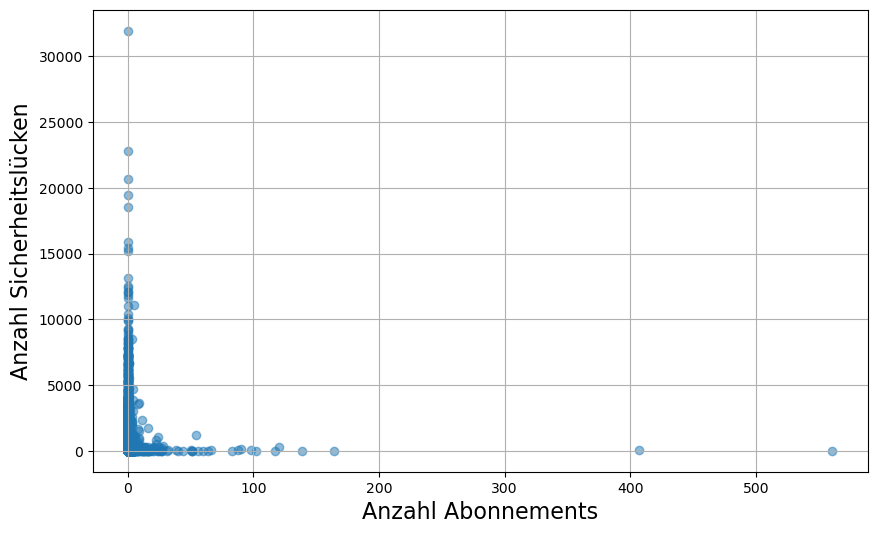

In [16]:
import matplotlib.pyplot as plt
# Beliebtheit vs Schwachstellenanzahl

helm_charts = {}

for package in db.packages.find({}):
    if "security_report_summary" in package:
        total_vulnerabilities = 0
        for severity in package['security_report_summary'].values():
            total_vulnerabilities += severity

        subscriptions = int(package["stats"]["subscriptions"])

        if subscriptions < 0:
            continue

        helm_charts[package['name']] = {
            'vulnerabilities': total_vulnerabilities,
            'subscriptions': subscriptions
        }

print(f"Anzahl der Helm Charts mit Schwachstellen Scan: {len(helm_charts)}")

# Plotting the data
subscriptions = [chart["subscriptions"] for chart in helm_charts.values()]
vulnerabilities = [chart["vulnerabilities"] for chart in helm_charts.values()]

plt.figure(figsize=(10, 6))
plt.scatter(subscriptions, vulnerabilities, alpha=0.5)
plt.xlabel("Anzahl Abonnements", fontsize=16)
plt.ylabel("Anzahl Sicherheitslücken", fontsize=16)
plt.grid(True)
plt.show()


In [17]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, pearson_p = pearsonr(subscriptions, vulnerabilities)
spearman_corr, spearman_p = spearmanr(subscriptions, vulnerabilities)

print(f"Pearson-Korrelation: {pearson_corr:.3f} (p-Wert: {pearson_p:.3f})")
print(f"Spearman-Korrelation: {spearman_corr:.3f} (p-Wert: {spearman_p:.3f})")

Pearson-Korrelation: -0.023 (p-Wert: 0.084)
Spearman-Korrelation: -0.091 (p-Wert: 0.000)
